In [89]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import boxcox, yeojohnson

In [90]:
# Read the data
df1 = pd.read_csv("data_long.csv", index_col=0)
df1.index = df1.index - 1

df1.rename(columns={"V1":"year_month"}, inplace = True)

## Mapping the country names

In [91]:
country_codes = {
    'us': 'United States',
    'no': 'Norway',
    'ca': 'Canada',
    'be': 'Belgium',
    'se': 'Sweden',
    'is': 'Iceland',
    'ch': 'Switzerland',
    'it': 'Italy',
    'gb': 'United Kingdom',
    'de': 'Germany',
    'fr': 'France',
    'fi': 'Finland',
    'nl': 'Netherlands',
    'es': 'Spain',
    'mx': 'Mexico',
    'pt': 'Portugal',
    'at': 'Austria',
    'jp': 'Japan',
    'ie': 'Ireland',
    'cz': 'Czech Republic',
    'sk': 'Slovakia',
    'hu': 'Hungary',
    'dk': 'Denmark',
    'gr': 'Greece',
    'tr': 'Turkey',
    'pl': 'Poland'
}

df1["country"] = df1["country"].map(country_codes)

In [92]:
# Read additional dataset
df2 = pd.read_csv("data/spotify-charts/aggregated_monthly_data.csv")
df2.rename(columns={"region":"country"}, inplace = True)
df2.head()

,country,year_month,streams,af_danceability,af_energy,af_key,af_loudness,af_speechiness,af_acousticness,af_valence,af_tempo
0,Austria,201801,29863910.0,0.691249,0.684617,5.122358,-5.846572,0.119376,0.175124,0.486446,117.674187
1,Austria,201802,28286988.0,0.695760,0.693843,5.238471,-5.742824,0.121329,0.176138,0.486738,119.090731
2,Austria,201803,32582416.0,0.692995,0.693900,5.415067,-5.739988,0.120693,0.178559,0.492635,118.745881
3,Austria,201804,33626060.0,0.683926,0.694538,5.401500,-5.722929,0.121382,0.174273,0.473749,119.247421
4,Austria,201805,35093811.0,0.685694,0.690436,5.301452,-5.672861,0.120850,0.183717,0.472116,117.406723


In [93]:
# Merge both datasets
df = df1.merge(df2, on = ["country","year_month"])
df.drop('valence', axis = 1, inplace = True)
df.head()

,year_month,time,country,sky,temperature,streams,af_danceability,af_energy,af_key,af_loudness,af_speechiness,af_acousticness,af_valence,af_tempo
0,201801,1,United States,0.300845,31.735123,2.282281e+09,0.712016,0.616000,5.581505,-6.361037,0.132351,0.169990,0.449925,121.425306
1,201802,2,United States,0.464499,40.175188,2.201219e+09,0.712491,0.616076,5.608393,-6.395776,0.132539,0.171020,0.451701,120.919127
2,201803,3,United States,0.413125,38.659179,2.510434e+09,0.717007,0.620332,5.574839,-6.391239,0.132868,0.174184,0.457444,120.793668
3,201804,4,United States,0.429780,46.883231,2.700912e+09,0.712077,0.629253,5.590167,-6.350264,0.138892,0.179250,0.450550,123.021229
4,201805,5,United States,0.445743,62.349299,2.660145e+09,0.708598,0.630255,5.551935,-6.276583,0.138936,0.194575,0.443926,123.502802


# Handling Missing Values

<Axes: >

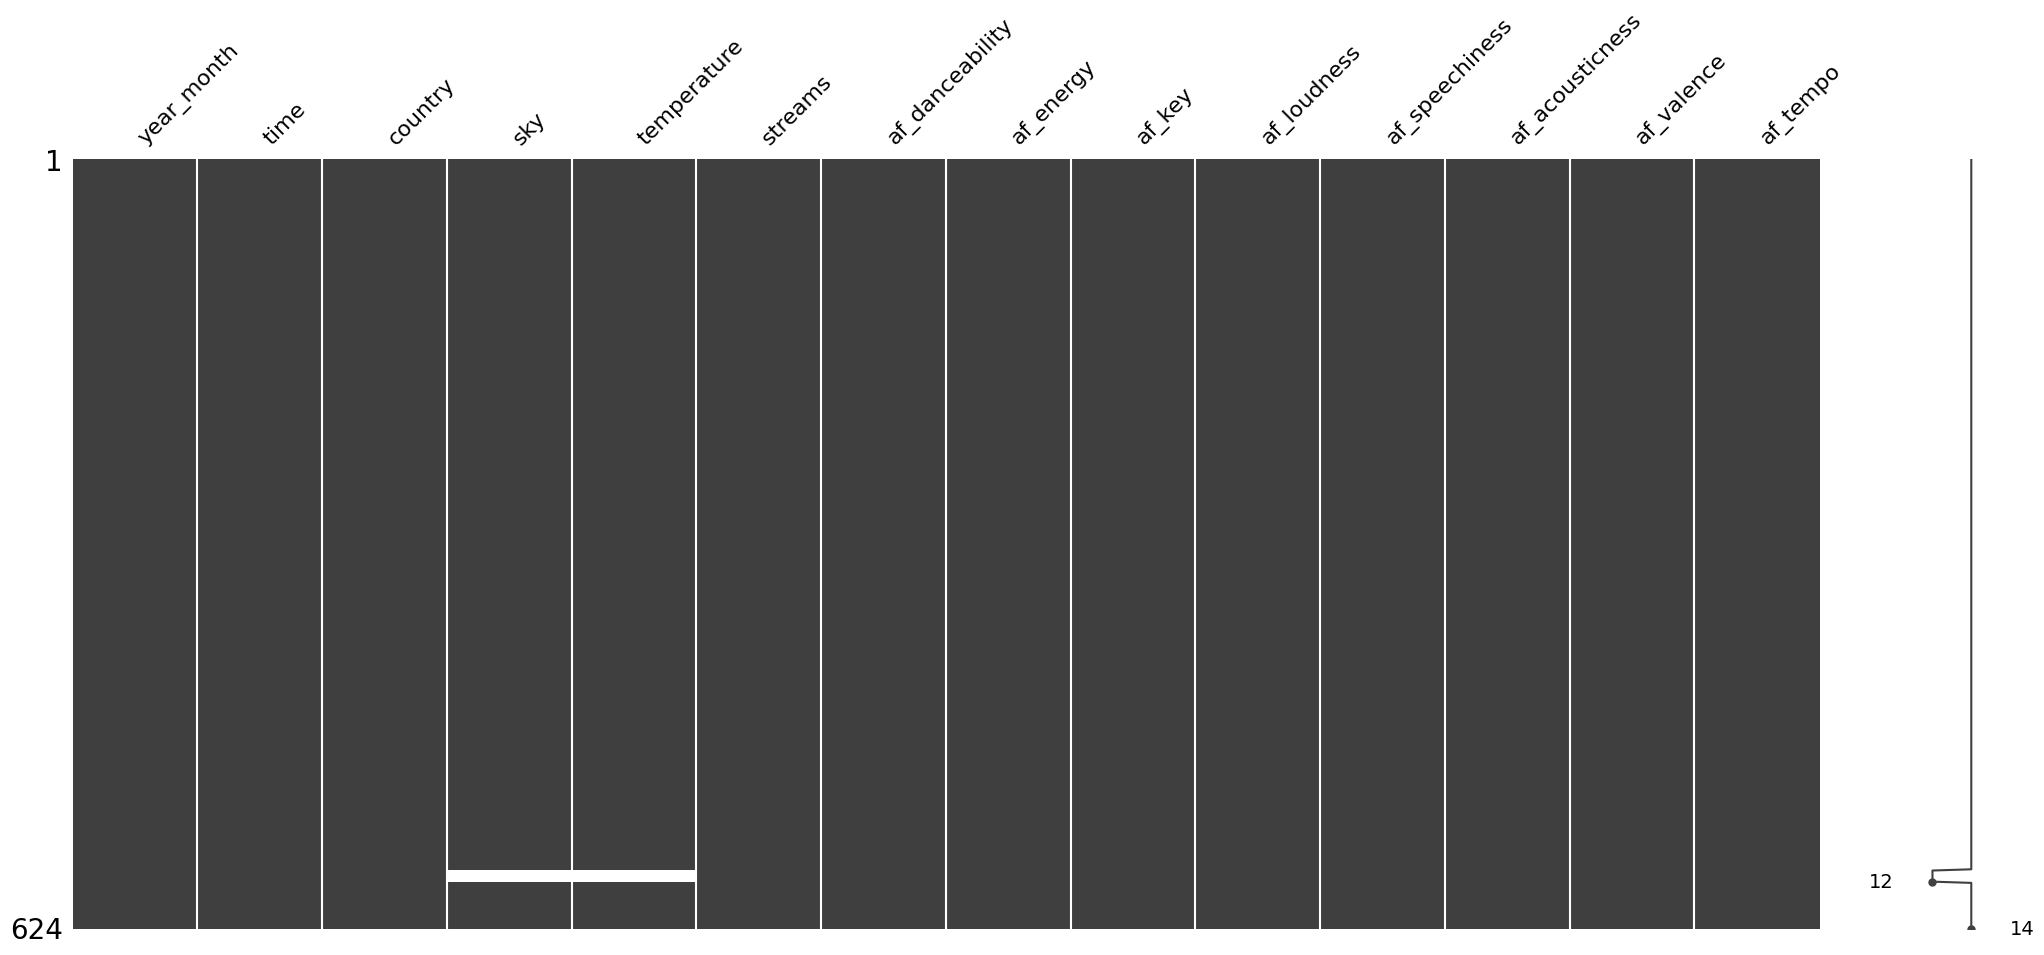

In [94]:
# Check the NA's
msno.matrix(df)

In [95]:
df.isna().sum()[(df.isna().sum() > 0)]

sky            10
temperature    10
dtype: int64

In [96]:
df[df['country'] == 'Turkey']

,year_month,time,country,sky,temperature,streams,af_danceability,af_energy,af_key,af_loudness,af_speechiness,af_acousticness,af_valence,af_tempo
576,201801,1,Turkey,NaN,NaN,97326911.0,0.669314,0.649609,5.287466,-6.726767,0.095843,0.252991,0.514158,116.312871
577,201802,2,Turkey,NaN,NaN,85258775.0,0.656927,0.648986,5.221111,-6.737214,0.094825,0.256092,0.497903,116.794929
578,201803,3,Turkey,NaN,NaN,103721293.0,0.649458,0.647181,5.352742,-6.883339,0.094643,0.247998,0.492079,117.707909
579,201804,4,Turkey,NaN,NaN,101572468.0,0.650174,0.652174,5.364500,-6.878690,0.096967,0.228456,0.486740,117.985501
580,201805,5,Turkey,NaN,NaN,110086997.0,0.654960,0.657891,5.406774,-6.799122,0.097266,0.221211,0.487546,118.280288
581,201806,6,Turkey,NaN,NaN,122953455.0,0.661127,0.657860,5.380500,-6.827925,0.105524,0.222316,0.475835,118.425348
582,201807,7,Turkey,NaN,NaN,126061070.0,0.671278,0.652585,5.370968,-6.908297,0.111213,0.228650,0.466145,119.002157
583,201808,8,Turkey,NaN,NaN,123323977.0,0.676636,0.651509,5.519677,-6.899707,0.115424,0.227612,0.454272,117.745771
584,201809,9,Turkey,NaN,NaN,127632060.0,0.678929,0.648506,5.582333,-6.903656,0.115136,0.231241,0.455265,118.490393
585,201810,10,Turkey,NaN,NaN,147356241.0,0.669160,0.636861,5.626452,-7.048330,0.109505,0.244421,0.460491,118.642401


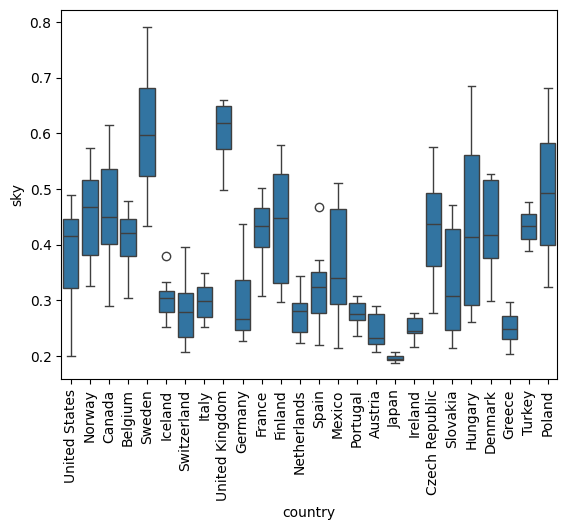

In [71]:
# Visualize the distribution for variable 'sky' via country
sns.boxplot(data = df.loc[df['year_month'] < 201901], x = 'country', y = 'sky')
plt.xticks(rotation = 90)
plt.show()

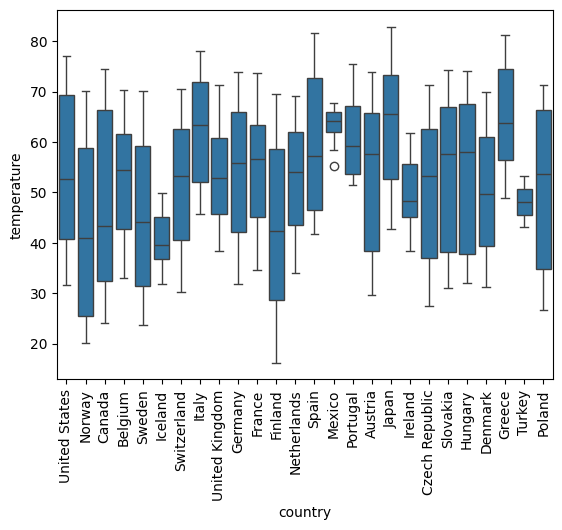

In [72]:
# Visualize the distribution for variable 'temperature' via country
sns.boxplot(data = df.loc[df['year_month'] < 201901], x = 'country', y = 'temperature')
plt.xticks(rotation = 90)
plt.show()

In [98]:
# Impute the NA's

# Variable 'sky' - NA's observed for turkey
df.loc[df['country'] == 'Turkey', 'sky'] = df.loc[df['country'] == 'Turkey', 'sky'].fillna(np.median(df.loc[df['country'] == 'Turkey', 'sky'].dropna()))

# Variable 'temperature' - NA's observed for turkey
df.loc[df['country'] == 'Turkey', 'temperature'] = df.loc[df['country'] == 'Turkey', 'temperature'].fillna(np.median(df.loc[df['country'] == 'Turkey', 'temperature'].dropna()))


In [100]:
# There are no more NA's
df.isna().sum()

year_month         0
time               0
country            0
sky                0
temperature        0
streams            0
af_danceability    0
af_energy          0
af_key             0
af_loudness        0
af_speechiness     0
af_acousticness    0
af_valence         0
af_tempo           0
dtype: int64

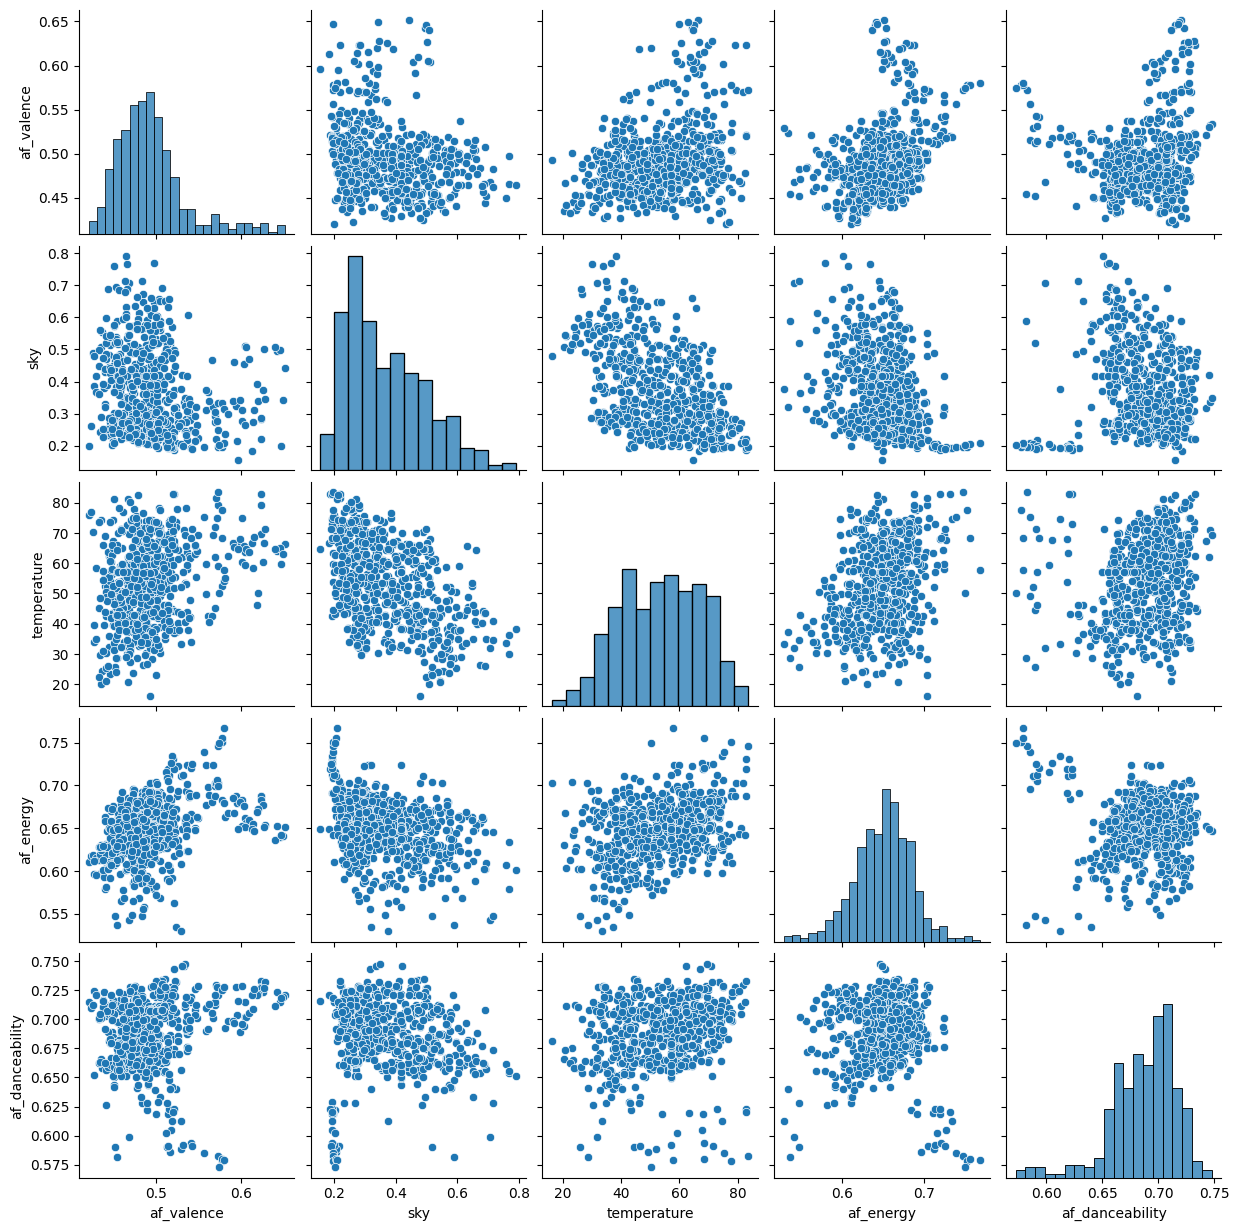

In [99]:
sns.pairplot(data=df,vars = ["af_valence","sky","temperature", "af_energy", "af_danceability"])

In [24]:
print(f'Unique countries {df["country"].unique()}')
print(f'Value counts per country')
df["country"].value_counts()

Unique countries ['United States' 'Norway' 'Canada' 'Belgium' 'Sweden' 'Iceland'
 'Switzerland' 'Italy' 'United Kingdom' 'Germany' 'France' 'Finland'
 'Netherlands' 'Spain' 'Mexico' 'Portugal' 'Austria' 'Japan' 'Ireland'
 'Czech Republic' 'Slovakia' 'Hungary' 'Denmark' 'Greece' 'Turkey'
 'Poland']
Value counts per country


country
United States     24
Norway            24
Turkey            24
Greece            24
Denmark           24
Hungary           24
Slovakia          24
Czech Republic    24
Ireland           24
Japan             24
Austria           24
Portugal          24
Mexico            24
Spain             24
Netherlands       24
Finland           24
France            24
Germany           24
United Kingdom    24
Italy             24
Switzerland       24
Iceland           24
Sweden            24
Belgium           24
Canada            24
Poland            24
Name: count, dtype: int64

In [101]:
# Export preprocessed data
df.to_csv('preprocessed_data.csv')